In [1]:
# import pandas_market_calendars as mcal
# from datetime import datetime
# import time
# import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


from BlackBox_Funs import connect, create_data, all_stocks_1050, get_array, sum, create_t_and_t
data_client = connect()


In [2]:
stock = "V"

In [3]:
stock_array = get_array("V")
spy_array = get_array("SPY")

In [4]:
# randomized buy and sells
x = 200 # amout of days for one full test
total = 100 # some starting value
# 3 actions of buy sell hold for each day
day1 = len(stock_array)

day_bought = 0  # when on array of last buy
hold = 0  # if currently holding a stock
sum_total = []
action = 0

for day in range(x):
    # get value of the day 1

    if hold == 1: # allready have the stock
        action = random.randint(0,2)  # sell or hold
        if action == 1: # sell 
            total += total * (sum(stock_array, day_bought, day)/100)
            day_bought = - 1
            hold = 0
        else:
            total += total*(stock_array[day]/100) 
    else: 
        # hold = 0 npt
        action = random.randint(0,2)  # Buy or wait
        if action == 1: # buy
            hold = 1
            day_bought = day  
        total += total*(stock_array[day]/100)     
    sum_total.append(total)  # only see the value change when selling 
# if hold == 1:
#     total += total * (sum(stock_array, day_bought, day)/100)
    

print(total)
print(stock_array)
print("Total start to end", 100 + sum(stock_array, 0, len(stock_array)))  # need to change 100 if use other value for starting value * 100 / 100


111.20983867085087
[-0.61, 0.36, -0.7, 1.33, 0.86, 0.81, 0.21, 0.32, -2.33, 0.05, -1.11, 0.35, 0.82, 0.35, 1.03, -0.99, 0.38, 0.97, -0.05, -1.19, -0.19, -0.37, 0.02, -0.74, -0.24, 0.02, -0.67, 1.57, -0.61, -0.74, 0.43, 0.63, -0.22, 1.0, 1.12, -0.19, -0.65, -0.31, -0.31, -0.71, -0.18, -0.18, 0.8, -2.67, 0.04, 0.51, -0.62, -0.44, -0.22, 0.3, -2.38, 0.15, 0.61, -0.34, -0.33, 0.55, 0.38, -1.57, -1.25, 0.16, -0.74, 0.21, -0.44, -1.24, -0.64, -2.32, 0.14, 0.57, 0.24, 0.42, -0.18, -0.88, 0.17, 0.93, 0.4, 0.37, -0.93, 0.15, -0.32, -0.81, -0.01, -1.0, 1.25, -0.35, 0.39, -0.39, 1.64, 0.78, 0.21, -0.85, 1.2, 0.39, 0.75, -0.49, 0.52, -1.35, 0.0, 0.71, -0.66, -0.15, 1.34, -1.39, 0.93, 2.51, 0.75, 0.24, -0.34, -0.11, -0.38, 1.01, 0.1, 0.84, 0.65, -0.36, -0.54, -0.15, 0.51, 0.61, -0.42, 0.6, -0.22, -0.29, -0.08, 0.72, -0.12, 0.24, -0.6, 0.79, -1.3, 0.53, -0.13, 1.38, -1.69, 1.25, 0.88, 0.6, 0.29, 0.36, -0.59, 0.17, -0.57, 0.26, 0.96, 0.12, -0.36, -0.06, 0.04, 0.28, 0.88, 0.14, 0.04, -0.01, 0.53, 0.31

In [5]:
def create_ordered_days(stock_array, spy_array):
    '''for testing on the test days to come'''
    x_test = np.zeros((len(stock_array) - int(len(stock_array)*.8), 14))
    y_test = np.zeros(len(stock_array) - int(len(stock_array)*.8))

    for i in range(int(len(stock_array) *.8), len(stock_array)):
        k = i - int(len(stock_array) *.8)
        x_test[k, :7] = spy_array[k:k + 7]
        x_test[k, 7:14] = stock_array[k:k + 7]
        if (stock_array[k+8] > 0.0): 
            y_test[k] = 1
        else:
            y_test[k] = 0
    return x_test, y_test


x_test, y_test = create_ordered_days(stock_array, spy_array)
print(x_test.shape)
print(x_test)
print(spy_array)
print(stock_array)
#print(y_test)  
    

(146, 14)
[[ 0.61  0.06  0.69 ...  0.86  0.81  0.21]
 [ 0.06  0.69  0.48 ...  0.81  0.21  0.32]
 [ 0.69  0.48 -0.61 ...  0.21  0.32 -2.33]
 ...
 [ 0.91  0.7  -0.22 ...  0.28  0.88  0.14]
 [ 0.7  -0.22 -0.07 ...  0.88  0.14  0.04]
 [-0.22 -0.07 -0.39 ...  0.14  0.04 -0.01]]
[0.61, 0.06, 0.69, 0.48, -0.61, 0.11, 0.08, 0.2, -0.83, 0.59, -0.33, -0.36, -0.19, 0.14, 0.06, 0.07, -0.01, -0.42, -0.36, 0.2, 0.41, 0.74, 1.04, 0.08, 0.32, -1.74, -0.23, 0.14, -1.5, 0.52, -0.35, -0.52, 0.37, -0.42, 0.46, -1.13, 0.15, -0.08, 0.88, 0.52, 0.65, 0.17, 1.03, -0.18, 0.6, 1.29, -1.86, 0.56, 1.12, -0.53, -1.73, 0.33, -0.78, -0.23, 0.4, -0.54, -1.39, -0.14, 0.3, -0.62, -1.05, -0.33, 0.35, -0.09, 0.42, -0.88, 0.76, -0.08, -0.03, 0.52, 0.5, 0.98, -0.05, -0.54, 0.18, 0.33, 0.15, -0.29, 0.02, 0.02, -0.44, 0.24, 0.93, 0.35, -0.13, -0.05, 0.54, 0.47, 0.07, -0.06, 0.73, 0.37, -0.23, 0.72, -0.36, 0.08, -0.09, 0.3, -1.31, -0.15, 0.39, 0.09, 0.12, -0.22, 0.75, 0.42, -0.32, -0.19, 0.54, 0.37, -0.08, 0.55, 0.03, 0.17, -

In [6]:
import tensorflow as tf
model = tf.keras.models.load_model('V_testing_NN.h5')

test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc}")

print(x_test[1])
print(y_test[1])
print()
new_input = np.array([x_test[1]])  # 1 sample, 14 features
prediction = model.predict(new_input)    # so [0] = down   [1] == up
print(prediction)

C:\Users\irtho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Expected all entries in the `metrics` list to be metric objects. Received instead:
metrics=[[<MeanMetricWrapper name=accuracy>]]

In [8]:
# using basic NN to run doesnt seem to work well. accuracty doenst seem to match however from network
total = 100
day_bought = 0  # when on array of last buy
hold = 0  # if currently holding a stock
sum_total = []

test_stock_array = stock_array[(len(stock_array) - int(len(stock_array)*.8)):]

for day in range(len(x_test)):
    #prediction = model.predict(x_test[day])
    new_input = np.array([x_test[day]])  # predicts day+1
    prediction = model.predict(new_input)
    #print(prediction)
    if prediction[0][1] > .5: 
        # buy or hold
        if hold != 1: # if we don't already have the stock
            hold = 1 
            day_bought = day
           # we dont pick up the tab for today
        else: # already have the stock
             total += total*(test_stock_array[day]/100)
    else:
        if hold == 1: # curently have stock
            # sell
            total += total*(test_stock_array[day]/100)
            hold = 0
           # print(f"sold on {day}")
        #else: # waiting and don't want to buy stock
            
        
    print(total)
    sum_total.append(total)  # only see the value change when selling 
    
# if hold == 1:
#     total += total * (sum(stock_array, day_bought, day)/100)
print(total)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
100.28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
101.162464
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
101.3040914496
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
101.34461308617983
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
101.34461308617983
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
101.34461308617983
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
101.658781386747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
101.658781386747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
102.18740704995808
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
101.06334557240854
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
101.23515325988163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
101.23515325988163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
101.23515325988163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
101.23515325988163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
102.64232189019398
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
103.69953780566298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
104.38395475518035
1/1 ━━━━━━━━━━━━━

In [9]:
# This time testing based on perfect buying and selling + vs -  maximum of getting out of the days
total = 100
day_bought = 0  # when on array of last buy
hold = 0  # if currently holding a stock
sum_total = []

test_stock_array = stock_array[(len(stock_array) - int(len(stock_array)*.8)):]

for day in range(len(x_test)):
    #prediction = model.predict(x_test[day])
   # new_input = np.array([x_test[day]])  # predicts day+1
   # prediction = model.predict(new_input)
    #print(prediction)
    if (test_stock_array[day+1]>0): 
        # buy or hold
        if hold != 1: # if we don't already have the stock
            hold = 1 
            day_bought = day
           # we dont pick up the tab for today
        else: # already have the stock
             total += total*(test_stock_array[day]/100)
    else:
        if hold == 1: # curently have stock
            # sell
            total += total*(test_stock_array[day]/100)
            hold = 0
           # print(f"sold on {day}")
        #else: # waiting and don't want to buy stock
                    
                
    print(total)
    sum_total.append(total)  # only see the value change when selling 
            
# if hold == 1:
#     total += total * (sum(stock_array, day_bought, day)/100)
print(total)
print(len(sum_total))


100
100.28
101.162464
101.3040914496
101.34461308617983
101.34461308617983
101.88173953553658
102.19757292809675
102.19757292809675
102.72900030732285
102.72900030732285
102.90363960784529
103.47989998964923
103.47989998964923
103.47989998964923
104.91827059950535
105.99892878668025
106.69852171667235
107.1039760991957
107.1039760991957
107.1039760991957
109.22463482595978
110.05474205063707
110.13178037007252
110.13178037007252
110.13178037007252
110.13178037007252
110.858650120515
111.35751404605732
111.95884462190602
111.9924322752926
111.9924322752926
112.79877778767471
113.58836923218843
114.49707618604593
116.01988729932035
116.90163844279517
116.90163844279517
117.94206302493605
117.94206302493605
118.44921389594327
118.44921389594327
118.44921389594327
118.44921389594327
118.44921389594327
118.44921389594327
118.44921389594327
118.44921389594327
120.2733317899408
120.2733317899408
120.2733317899408
120.61009711895264
120.79101226463106
120.79101226463106
120.79101226463106
121.

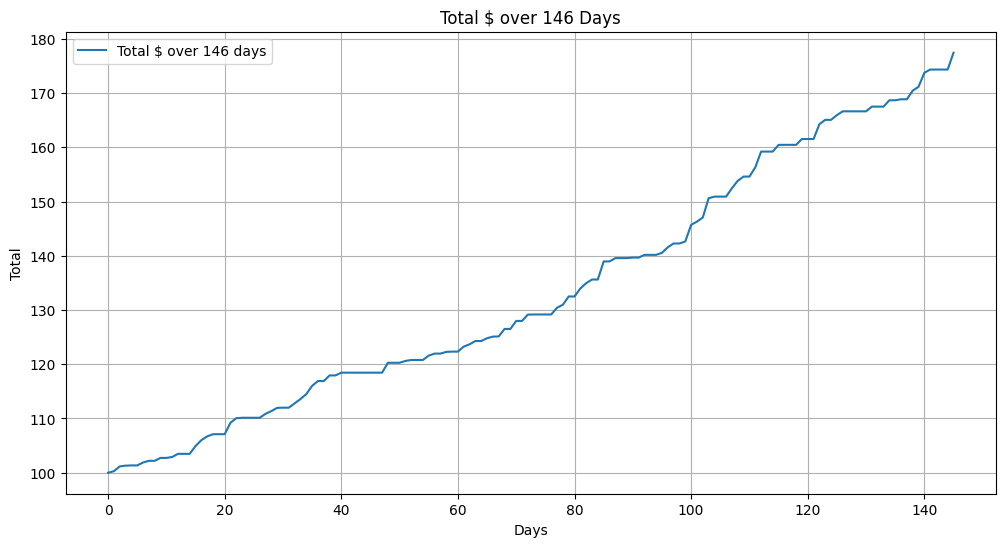

In [10]:
def graph(sum_total):
    plt.figure(figsize=(12, 6))
    plt.plot(sum_total, label=f'Total $ over {len(sum_total)} days')
    plt.title(f'Total $ over {len(sum_total)} Days')
    plt.xlabel('Days')
    plt.ylabel('Total')
    plt.legend()
    plt.grid(True)
    plt.show()
    
graph(sum_total)
